In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from IPython.display import Image, display
from sklearn.metrics import confusion_matrix

In [72]:
df = pd.read_csv("Data/data.csv",header=0)

# Data Analysis

In [73]:
#printing information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [74]:
#Check the top 10 rows
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [75]:
#Check for column with NAN value of empty or empty .
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [76]:
# Last row has 569 NAN value so deleting the column
df = df.dropna(axis=1)
df.shape

(569, 32)

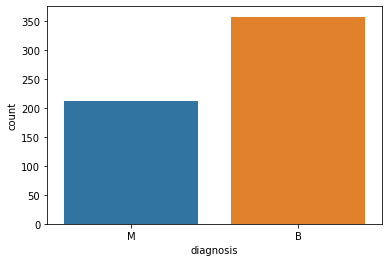

In [77]:
#Get count of M and B tumor
sns.countplot(df['diagnosis'],label="Count")

In [9]:
#Changing the labels of the diagnosis column to 1 for Maginant tumor and 0 for benign tumor
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
#Printing the pythin diagnosis 
print(df['diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [10]:
#checking Columns 
df.head(5) 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


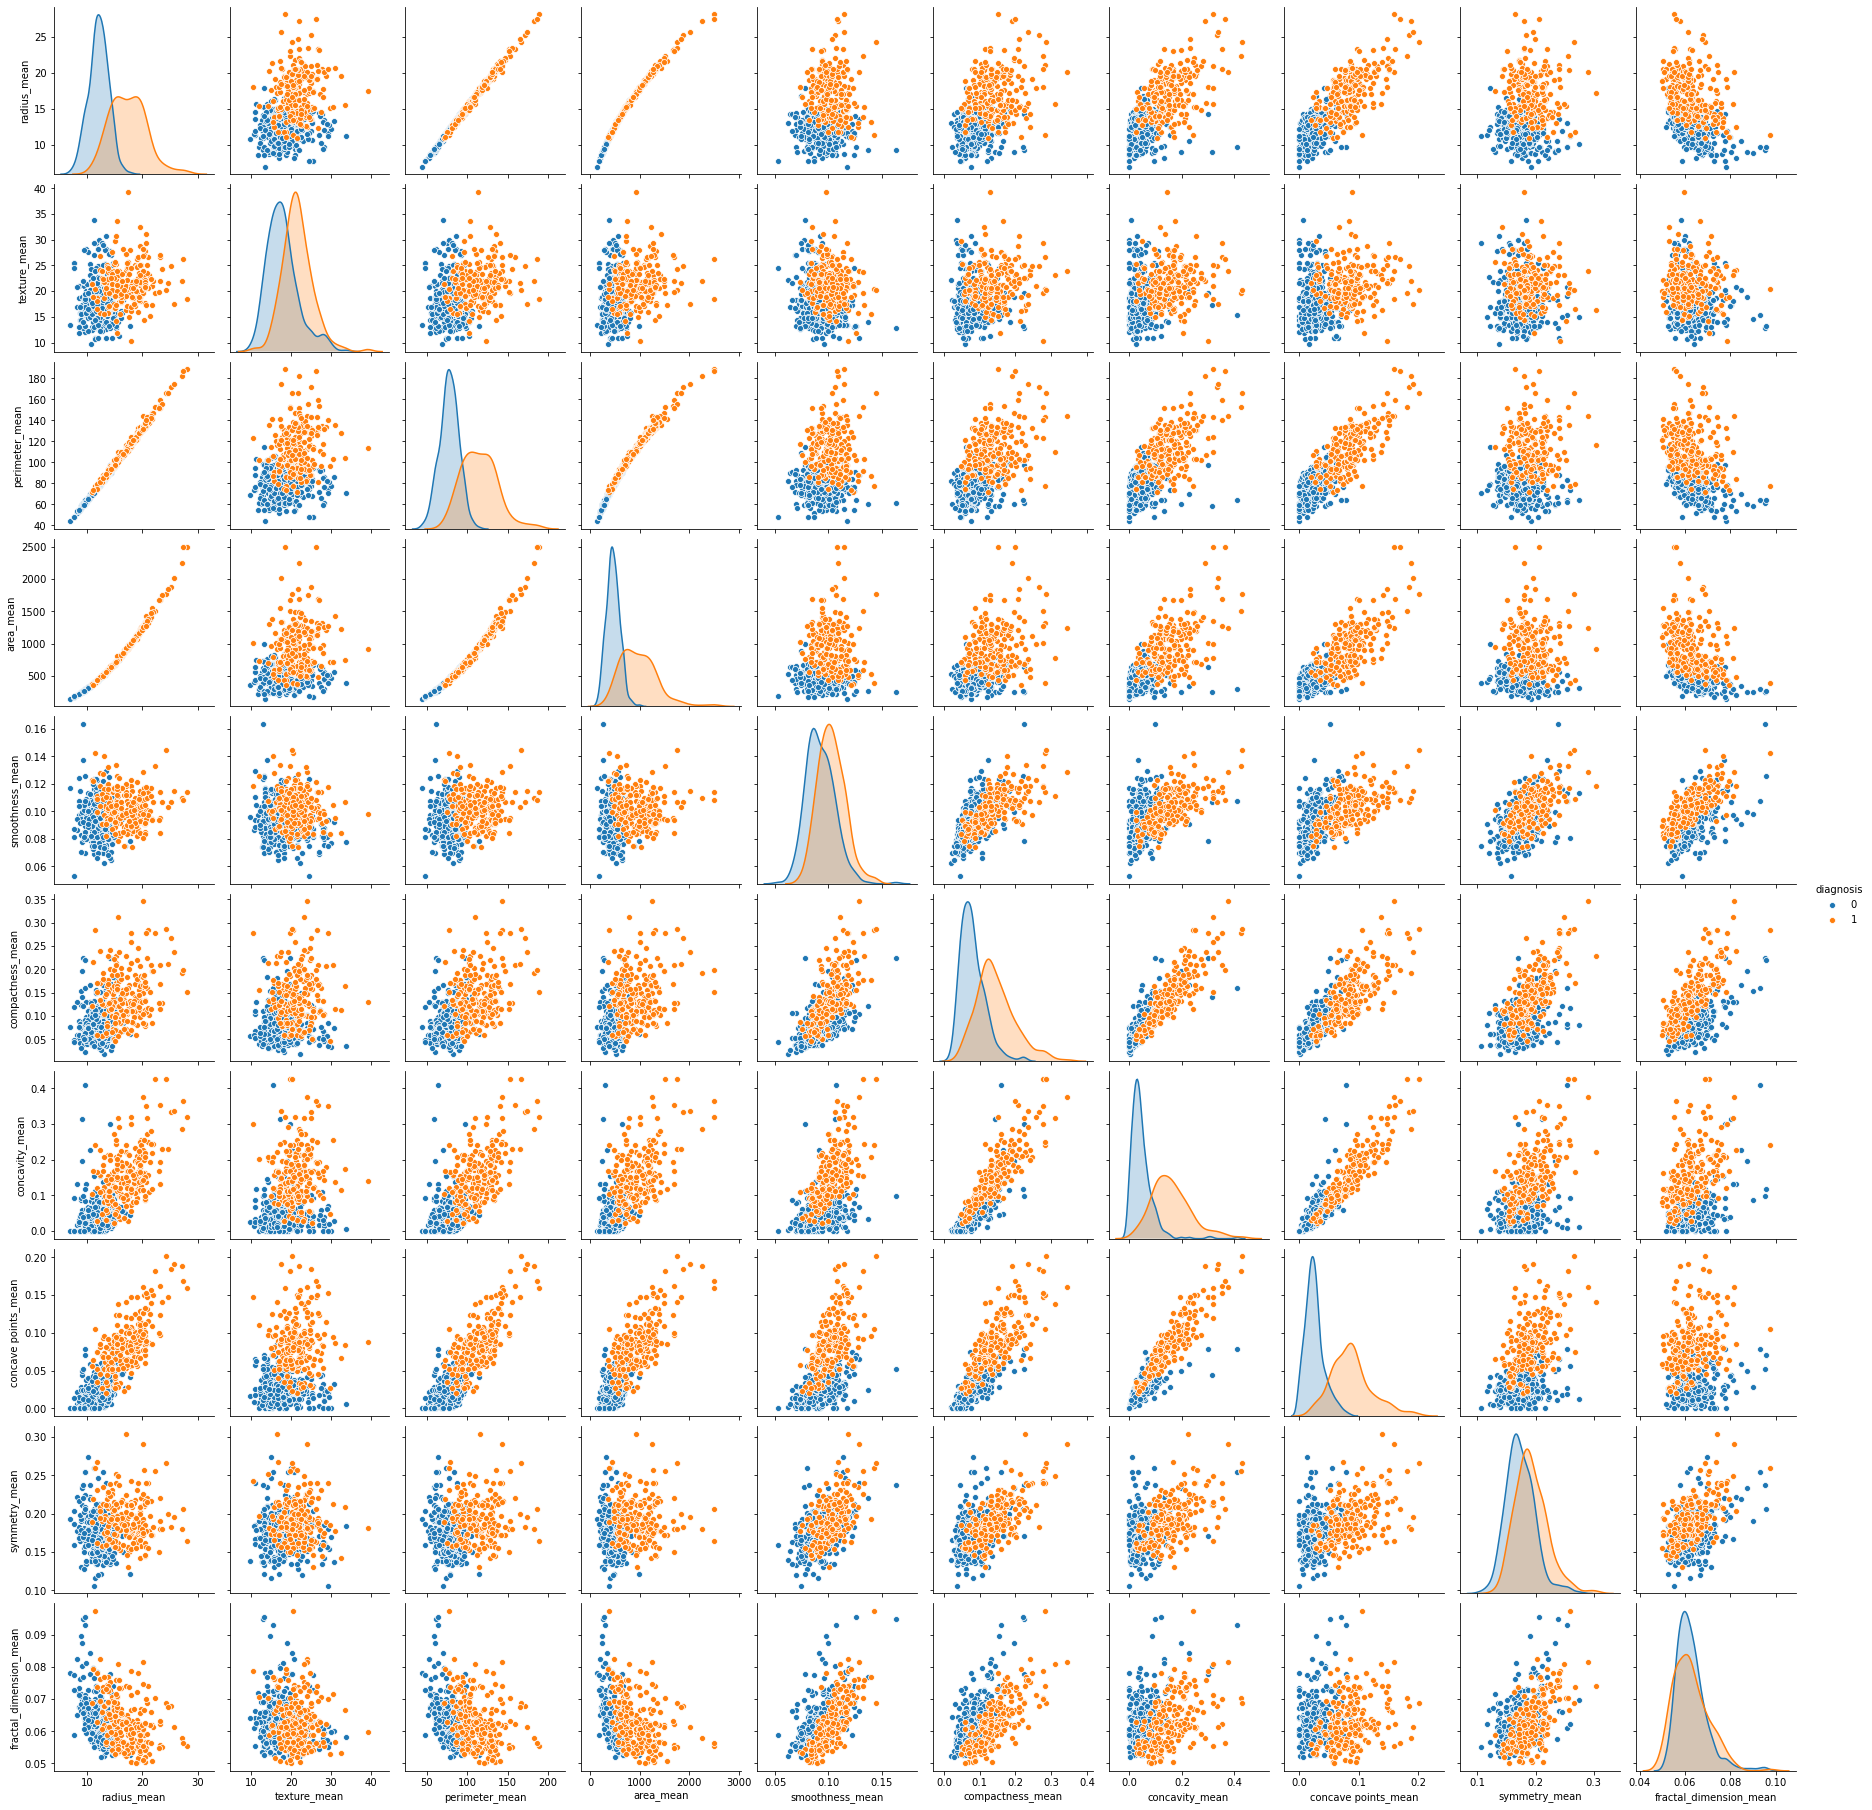

In [11]:
sns.pairplot(df.iloc[:,1:12], hue = 'diagnosis')

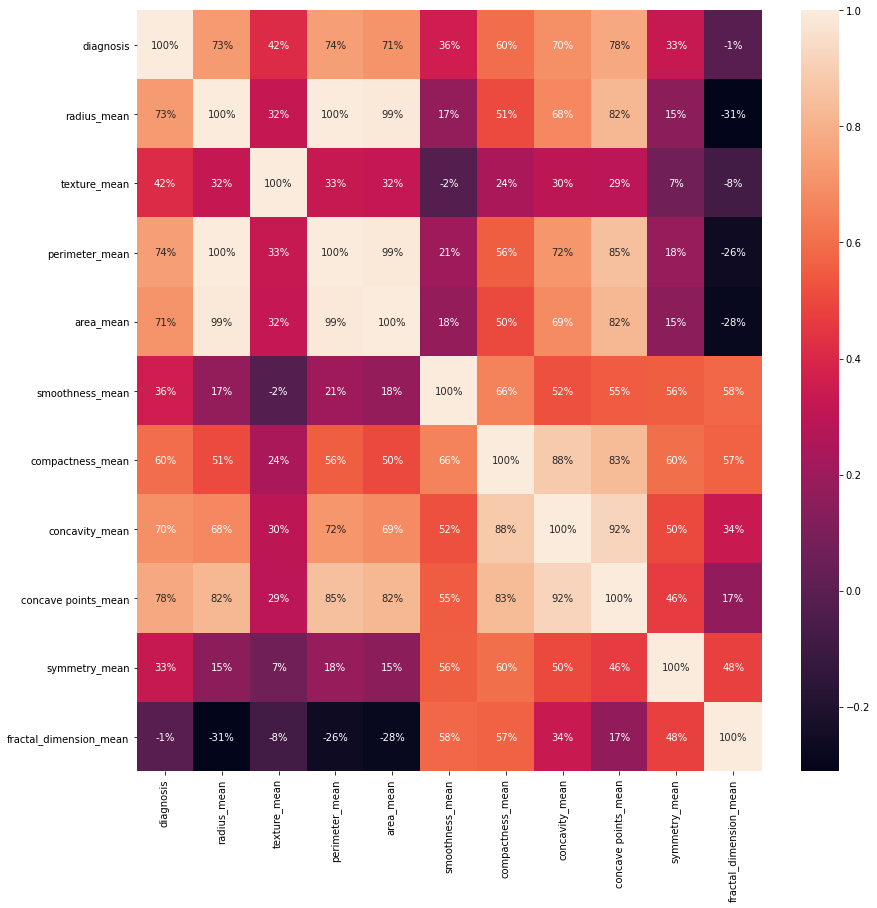

In [12]:
plt.figure(figsize=(14,14))
sns.heatmap(df.iloc[:,1:12].corr(),annot =True, fmt= '.0%')

# Preparaing Data for Classification

In [15]:
#Categorizing the data  and  label
#Converting data into numpy array
X_data = df.iloc[:,2:31].values
Y_data = df.iloc[:,1].values

In [16]:
#Spliting the data to training and testing data, % and 20%
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X_data,Y_data, test_size = 0.3,random_state = 0)

In [17]:
print(Xtrain.shape)
print(Xtest.shape)

(381, 29)
(188, 29)


In [18]:
#Scale the data (Feature Scaling)
Stdscaling = StandardScaler()
Xtrain = Stdscaling.fit_transform(Xtrain)
Xtest = Stdscaling.fit_transform(Xtest)

# Random Forest Classification

In [141]:
#Random Forest Classifier
model=RandomForestClassifier(n_estimators=50, max_depth = 7)# a simple random forest model
model.fit(Xtrain,Ytrain)

print('Random Forest Training accuracy = ', model.score(Xtrain,Ytrain) )#check what log score is 

Random Forest Training accuracy =  0.9973753280839895


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       121
           1       0.90      0.97      0.94        67

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.95      0.95      0.95       188

Random Forest Testing recall score = 0.90278
Random Forest Testing accuracy score = 0.95213


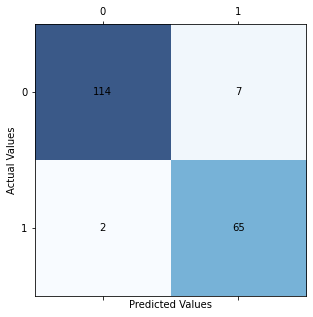

In [142]:
#Testing the test data 
prediction=model.predict(Xtest)
rf_accuracy = metrics.accuracy_score(prediction,Ytest)
rf_recall = metrics.recall_score(prediction,Ytest)
print(classification_report(Ytest,model.predict(Xtest)))
print('Random Forest Testing recall score = %0.5f'% rf_recall)
print('Random Forest Testing accuracy score = %0.5f'% rf_accuracy)
cnf_matrix = confusion_matrix(Ytest,prediction)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.8)
plt
for i in range(cnf_matrix.shape[0]):
     for j in range(cnf_matrix.shape[1]):
         ax.text(x=j, y=i,
                s=cnf_matrix[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()


In [143]:
rf_precision = metrics.precision_score(prediction,Ytest)
rf_F1 = metrics.f1_score(prediction,Ytest)
print('Random Forest Testing precision score = %0.5f'% rf_precision)
print('Random Forest Testing F1 score = %0.5f'% rf_F1)

Random Forest Testing precision score = 0.97015
Random Forest Testing F1 score = 0.93525


# SVM Classifier 

In [94]:
svmCls=svm.SVC(kernel='rbf',C=2).fit(Xtrain,Ytrain)
print('SVM Training accuracy = ', svmCls.score(Xtrain,Ytrain) )

SVM Training accuracy =  0.984251968503937


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       121
           1       0.94      0.99      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.98      0.97       188
weighted avg       0.97      0.97      0.97       188

SVM Testing recall = 0.9428571428571428
SVM Testing accuracy = 0.973404255319149 

SVM Testing precision = 0.9850746268656716
SVM Testing F1 = 0.9635036496350364 



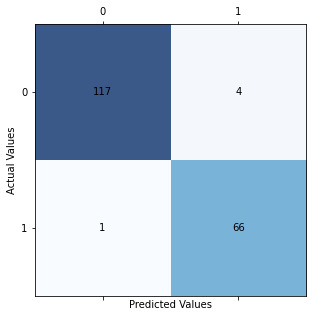

In [95]:
#Testing the test data 
predictionSVM=svmCls.predict(Xtest)
svm_accuracy = metrics.accuracy_score(predictionSVM,Ytest)
svm_recall = metrics.recall_score(predictionSVM,Ytest)
svm_precision = metrics.precision_score(predictionSVM,Ytest)
svm_F1 = metrics.f1_score(predictionSVM,Ytest)
print(classification_report(Ytest,predictionSVM))
print('SVM Testing recall =', svm_recall )
print('SVM Testing accuracy =', svm_accuracy)
print('SVM Testing precision =', svm_precision )
print('SVM Testing F1 =', svm_F1,'\n')

cnf_matrix = confusion_matrix(Ytest,predictionSVM)

#plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.8)
plt
for i in range(cnf_matrix.shape[0]):
     for j in range(cnf_matrix.shape[1]):
         ax.text(x=j, y=i,
                s=cnf_matrix[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

# KNN Classifier

In [24]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(Xtrain,Ytrain)
print('KNN Training accuracy = ', modelKNN.score(Xtrain,Ytrain) )#check what log score is 

KNN Training accuracy =  0.973753280839895


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       121
           1       0.94      0.93      0.93        67

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188

KNN Testing recall score= 0.93939
KNN Testing accuracy = 0.95213
KNN Testing precision = 0.92537
KNN Testing F1 score  = 0.93233 



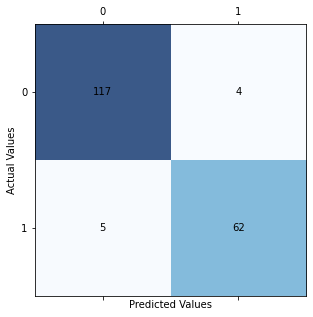

In [148]:
#Testing the test data 
predictionKNN=modelKNN.predict(Xtest)
KNN_accuracy = metrics.accuracy_score(predictionKNN,Ytest)
KNN_recall = metrics.recall_score(predictionKNN,Ytest)
KNN_precision = metrics.precision_score(predictionKNN,Ytest)
KNN_F1 = metrics.f1_score(predictionKNN,Ytest)
print(classification_report(Ytest,modelKNN.predict(Xtest)))
print('KNN Testing recall score= %0.5f' %KNN_recall)
print('KNN Testing accuracy = %0.5f'%KNN_accuracy)
print('KNN Testing precision = %0.5f'%KNN_precision)
print('KNN Testing F1 score  = %0.5f'%KNN_F1,'\n')
cnf_matrix = confusion_matrix(Ytest,predictionKNN)

#plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.8)
plt
for i in range(cnf_matrix.shape[0]):
     for j in range(cnf_matrix.shape[1]):
         ax.text(x=j, y=i,
                s=cnf_matrix[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

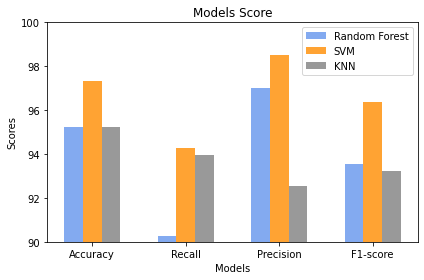

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot

n_groups = 4
knn = (KNN_accuracy*100, KNN_recall*100, KNN_precision*100, KNN_F1*100)
svm = (svm_accuracy*100, svm_recall*100, svm_precision*100, svm_F1*100)
randomForest = (rf_accuracy*100, rf_recall*100, rf_precision*100, rf_F1*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, randomForest, bar_width,
alpha=opacity,
color='cornflowerblue',
label='Random Forest')

rects2 = plt.bar(index + bar_width, svm, bar_width,
alpha=opacity,
color='darkorange',
label='SVM')

rects3 = plt.bar(index + bar_width+ bar_width, knn, bar_width,
alpha=opacity,
color='grey',
label='KNN')

plt.ylim(90,100)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Models Score')
plt.xticks(index + bar_width, ('Accuracy', 'Recall', 'Precision', 'F1-score'))
plt.legend()

plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

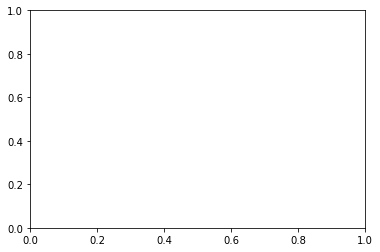

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot

n_groups = 4
#ValidationError (1.006,0.94125,0.91687,0.90616,0.94164, 90180 )
#Essor (1.006,0.94125,0.91687,0.90616,0.94164, 90180 )
knn = (1.006,1.07925)
randomForest = ( 0.94125,0.93986)
linearRegression = ( 0.91687,1.01079)
xgboost = (0.90616, 0.91484)
emsemble = (0.90180,0.92209)
lstm = (0.94164,1.07925)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, knn, bar_width,
alpha=opacity,
color='cornflowerblue',
label='KNN')

# rects2 = plt.bar(index + bar_width, lstm, bar_width,
# alpha=opacity,
# color='darkorange',
# label='LSTM')

# rects3 = plt.bar(index + 2 * bar_width, xgboost, bar_width,
# alpha=opacity,
# color='grey',
# label='XGBoost')

# rects4 = plt.bar(index + 3 * bar_width, randomForest, bar_width,
# alpha=opacity,
# color='grey',
# label='Random Forest')

# rects5 = plt.bar(index + 4 * bar_width, linearRegression, bar_width,
# alpha=opacity,
# color='grey',
# label='Linear Regression')

# rects6 = plt.bar(index + 5* bar_width, emsemble, bar_width,
# alpha=opacity,
# color='grey',
# label='Ensemble')

plt.ylim(0,100)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Models Score')
plt.xticks(index + bar_width, ('Accuracy', 'Recall', 'Precision', 'F1-score'))
plt.legend()

plt.tight_layout()
plt.show()

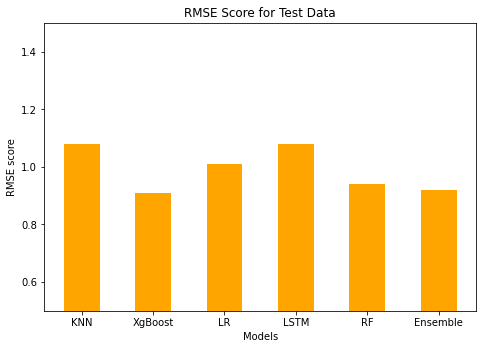

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['KNN', 'XgBoost', 'LR', 'LSTM', 'RF', 'Ensemble']
students = [1.08,0.91,1.01,1.08,0.94,0.92]
plt.ylim(0.5,1.5)
ax.bar(langs,students,0.5, color = 'orange')
plt.xlabel('Models')
plt.ylabel('RMSE score')
plt.title('RMSE Score for Test Data')
plt.show()